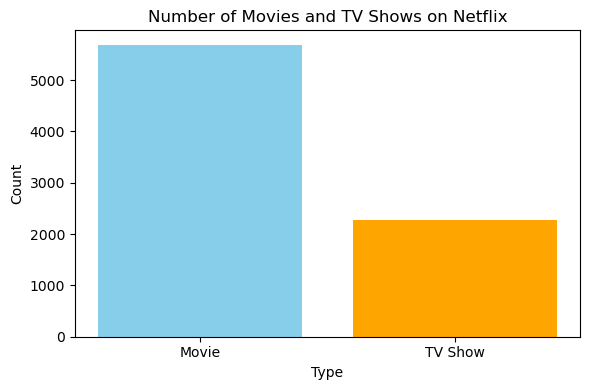

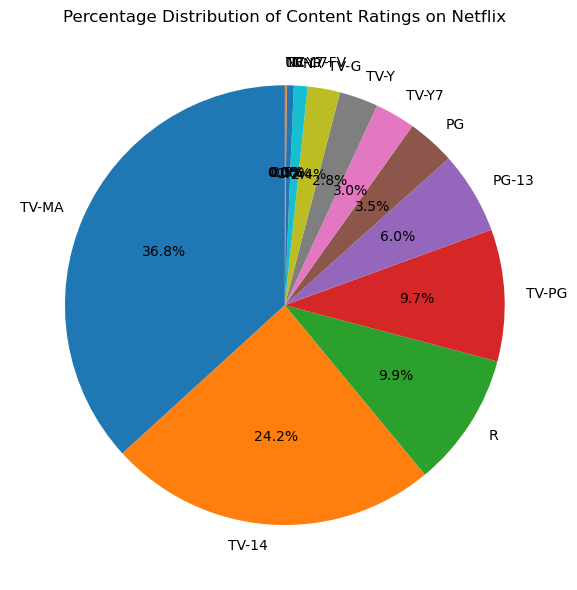

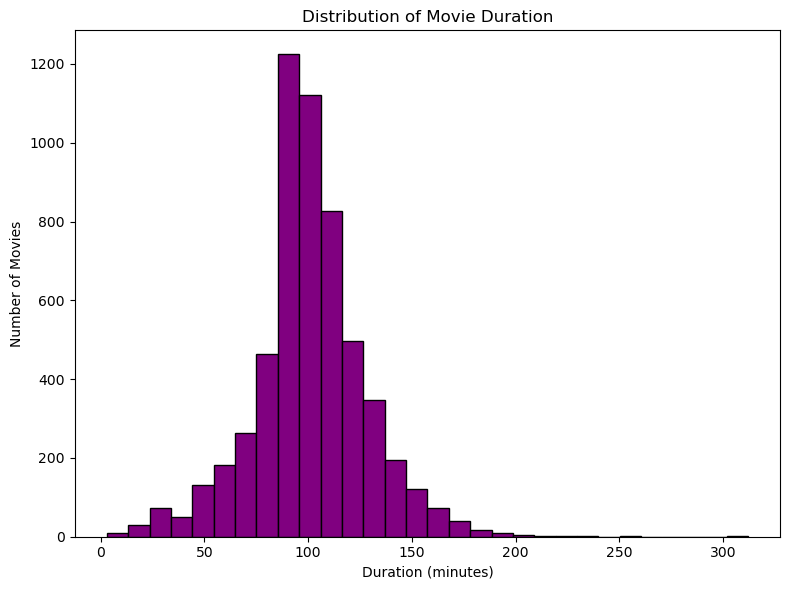

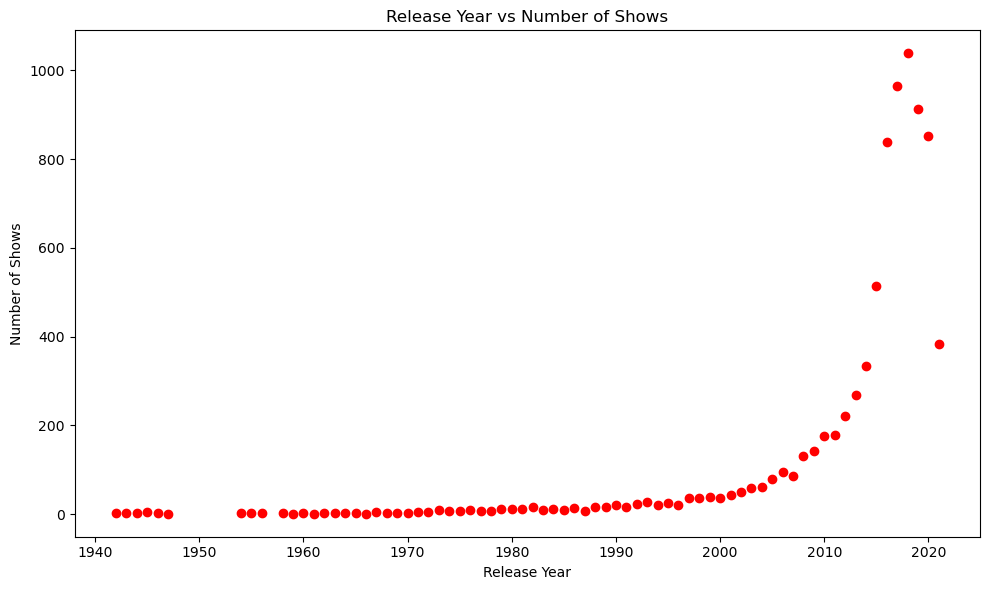

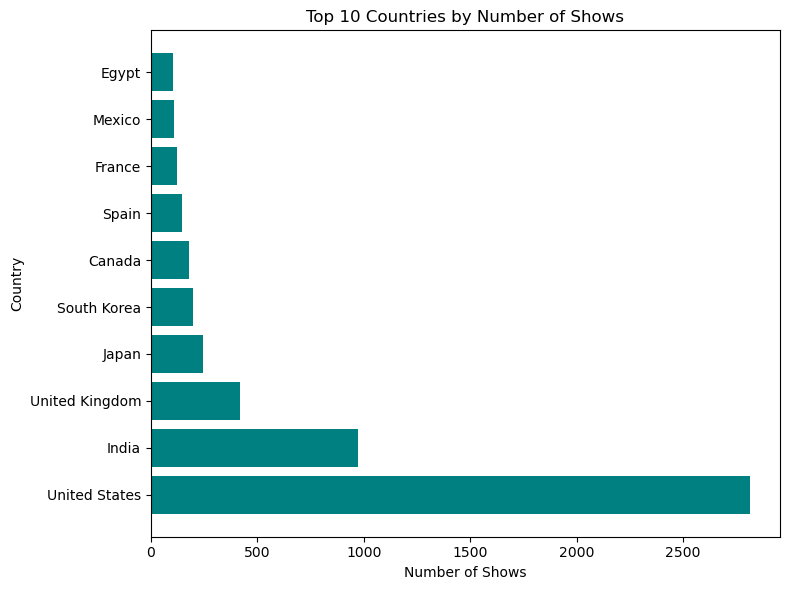

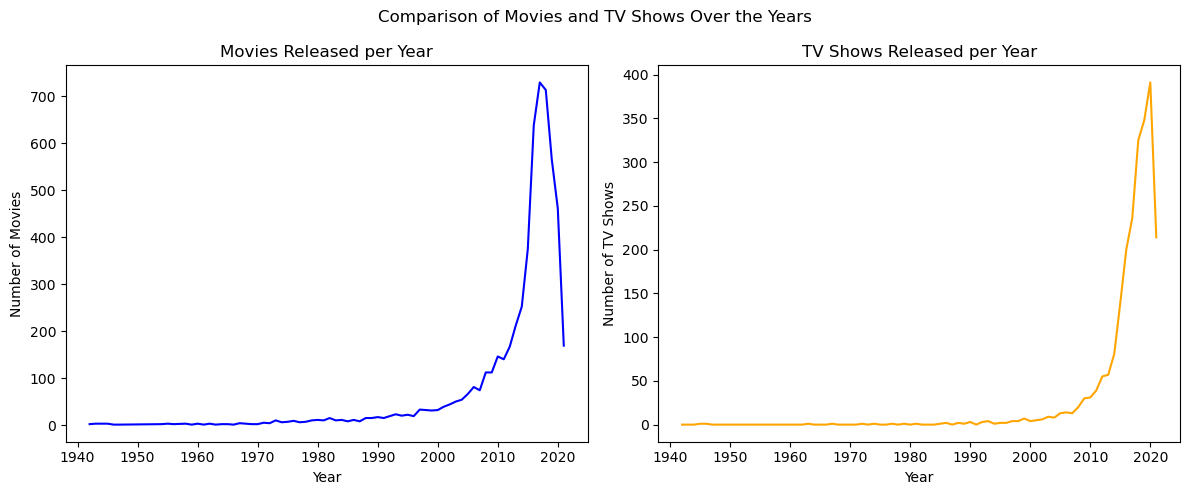

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('netflix_titles.csv')

# Data cleaning
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

# -----------------------------
# Movies vs TV Shows
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title("Number of Movies and TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

# -----------------------------
# Content Rating Distribution
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage Distribution of Content Ratings on Netflix")
plt.tight_layout()
plt.savefig('content_rating.png')
plt.show()

# -----------------------------
# Movie Duration Distribution
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '', regex=False).astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig('movies_duration_histogram.png')
plt.show()

# -----------------------------
# Release Year vs Number of Shows
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title("Release Year vs Number of Shows")
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig('release_year_vs_shows.png')
plt.show()

# -----------------------------
# Top 10 Countries by Content
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title("Top 10 Countries by Number of Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()

# -----------------------------
# Movies vs TV Shows Over Years
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title("Movies Released per Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title("TV Shows Released per Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of TV Shows")

fig.suptitle("Comparison of Movies and TV Shows Over the Years")
plt.tight_layout()
plt.savefig('movies_tvshows_comparison.png')
plt.show()

Netflix data visualization